<a href="https://colab.research.google.com/github/iDunnnnno/CCDEPLRL_PROJECT_COM211/blob/main/DEEPLEARNING_MODEL(fer2013).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/My Drive/finals/dataset10.zip'

Streaming output truncated to the last 5000 lines.
 extracting: dataset9/train/surprise/Training_59099538.jpg  
 extracting: dataset9/train/surprise/Training_59119116.jpg  
 extracting: dataset9/train/surprise/Training_59120196.jpg  
 extracting: dataset9/train/surprise/Training_59228927.jpg  
 extracting: dataset9/train/surprise/Training_59283450.jpg  
 extracting: dataset9/train/surprise/Training_59285565.jpg  
 extracting: dataset9/train/surprise/Training_59291103.jpg  
 extracting: dataset9/train/surprise/Training_59311854.jpg  
 extracting: dataset9/train/surprise/Training_59339205.jpg  
 extracting: dataset9/train/surprise/Training_59347620.jpg  
 extracting: dataset9/train/surprise/Training_59360785.jpg  
 extracting: dataset9/train/surprise/Training_59361384.jpg  
 extracting: dataset9/train/surprise/Training_59386521.jpg  
 extracting: dataset9/train/surprise/Training_59387538.jpg  
 extracting: dataset9/train/surprise/Training_59403824.jpg  
 extracting: dataset9/train/surpri

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Define image dimensions and batch size
img_height, img_width = 64, 64
batch_size = 20

In [ ]:
# Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/dataset9/train",
    image_size=(img_height, img_width),
    batch_size=batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/dataset9/validation",
    image_size=(img_height, img_width),
    batch_size=batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/dataset9/test",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 28273 files belonging to 6 classes.
Found 3533 files belonging to 6 classes.
Found 3533 files belonging to 6 classes.


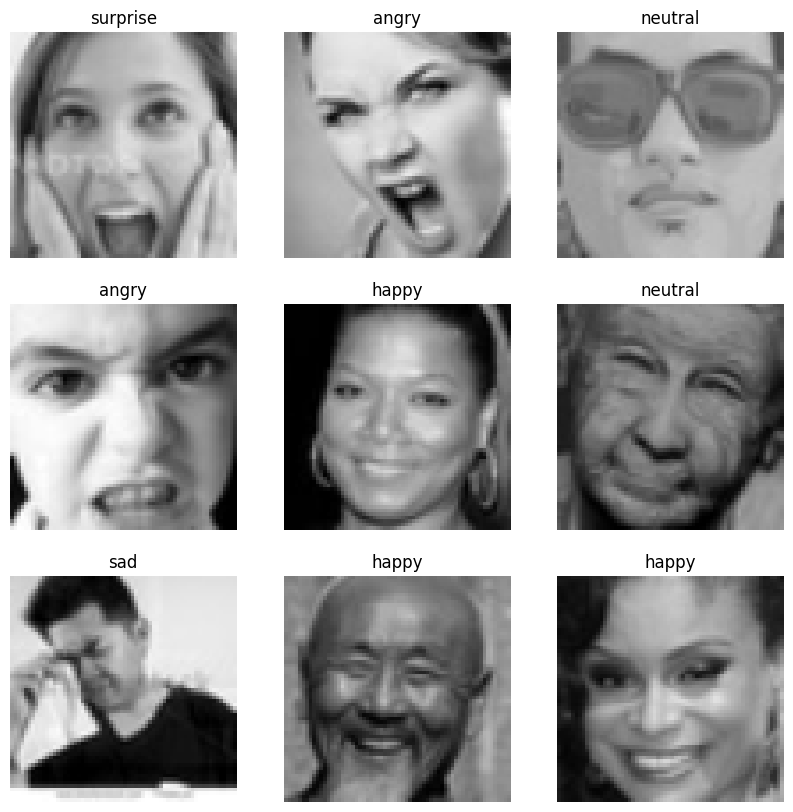

In [ ]:
# Class names for visualization
class_names = train_ds.class_names

# Plot sample images from the training set
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [ ]:
# Define the model with dropout layers for regularization
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(7)
])

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
# Train the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[early_stopping]
)

Epoch 1/30
1414/1414 [==============================] - 183s 129ms/step - loss: 1.6336 - accuracy: 0.3281 - val_loss: 1.4307 - val_accuracy: 0.4435
Epoch 2/30
1414/1414 [==============================] - 182s 129ms/step - loss: 1.4340 - accuracy: 0.4318 - val_loss: 1.3022 - val_accuracy: 0.4953
Epoch 3/30
1414/1414 [==============================] - 181s 128ms/step - loss: 1.3263 - accuracy: 0.4780 - val_loss: 1.2599 - val_accuracy: 0.5217
Epoch 4/30
1414/1414 [==============================] - 181s 128ms/step - loss: 1.2685 - accuracy: 0.5010 - val_loss: 1.2350 - val_accuracy: 0.5225
Epoch 5/30
1414/1414 [==============================] - 181s 128ms/step - loss: 1.2287 - accuracy: 0.5228 - val_loss: 1.2035 - val_accuracy: 0.5324
Epoch 6/30
1414/1414 [==============================] - 183s 129ms/step - loss: 1.1900 - accuracy: 0.5412 - val_loss: 1.1749 - val_accuracy: 0.5415
Epoch 7/30
1414/1414 [==============================] - 181s 128ms/step - loss: 1.1640 - accuracy: 0.5499 - val_

In [ ]:
# Function to plot epoch history
def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

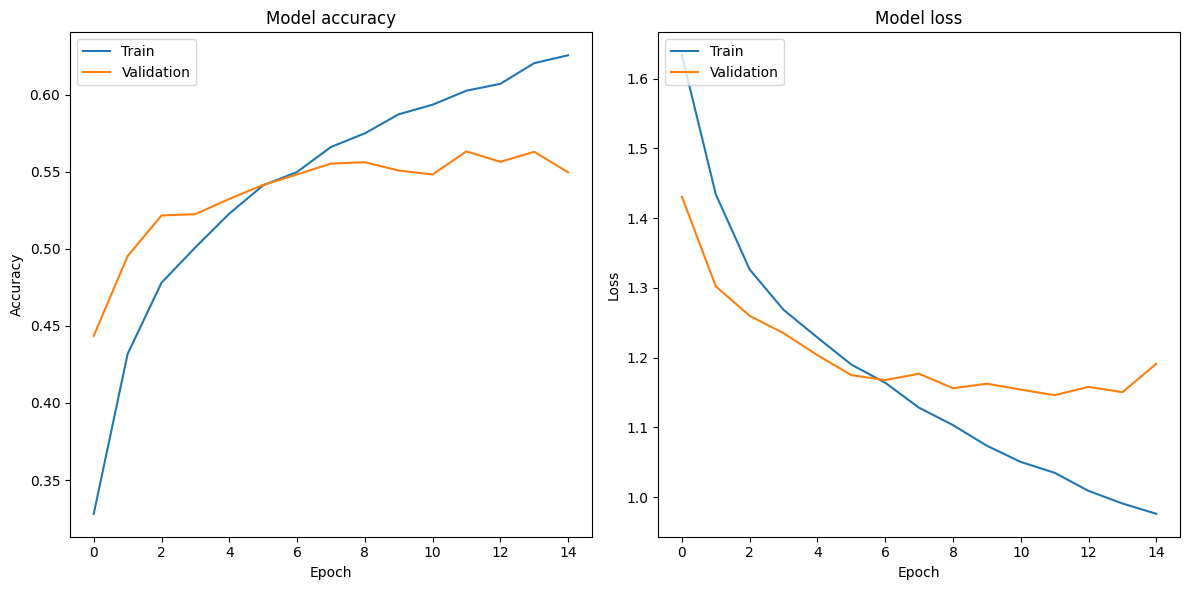

In [ ]:
# Plot epoch history
plot_history(history)

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_ds)
print(f'Test accuracy: {test_acc}')

177/177 [==============================] - 6s 32ms/step - loss: 1.1548 - accuracy: 0.5601
Test accuracy: 0.5601471662521362


In [ ]:
# Generate predictions and compute F1 score and confusion matrix
predictions = model.predict(test_ds)
predicted_labels = np.argmax(predictions, axis=1)

177/177 [==============================] - 6s 31ms/step


In [ ]:
true_labels = []
for _, labels in test_ds:
    true_labels.extend(labels.numpy())

In [ ]:
# Compute F1 score
f1 = classification_report(true_labels, predicted_labels, target_names=class_names)
print("F1 Score:")
print(f1)

F1 Score:
              precision    recall  f1-score   support

       angry       0.13      0.11      0.12       479
        fear       0.16      0.10      0.12       512
       happy       0.24      0.26      0.25       887
     neutral       0.19      0.24      0.21       617
         sad       0.19      0.17      0.18       623
    surprise       0.12      0.14      0.13       415

    accuracy                           0.18      3533
   macro avg       0.17      0.17      0.17      3533
weighted avg       0.18      0.18      0.18      3533



In [ ]:
# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 54  46 133  99  83  64]
 [ 68  49 133 107  78  77]
 [113  72 232 186 150 134]
 [ 70  54 161 146  98  88]
 [ 73  56 174 133 109  78]
 [ 46  37 116  89  68  59]]


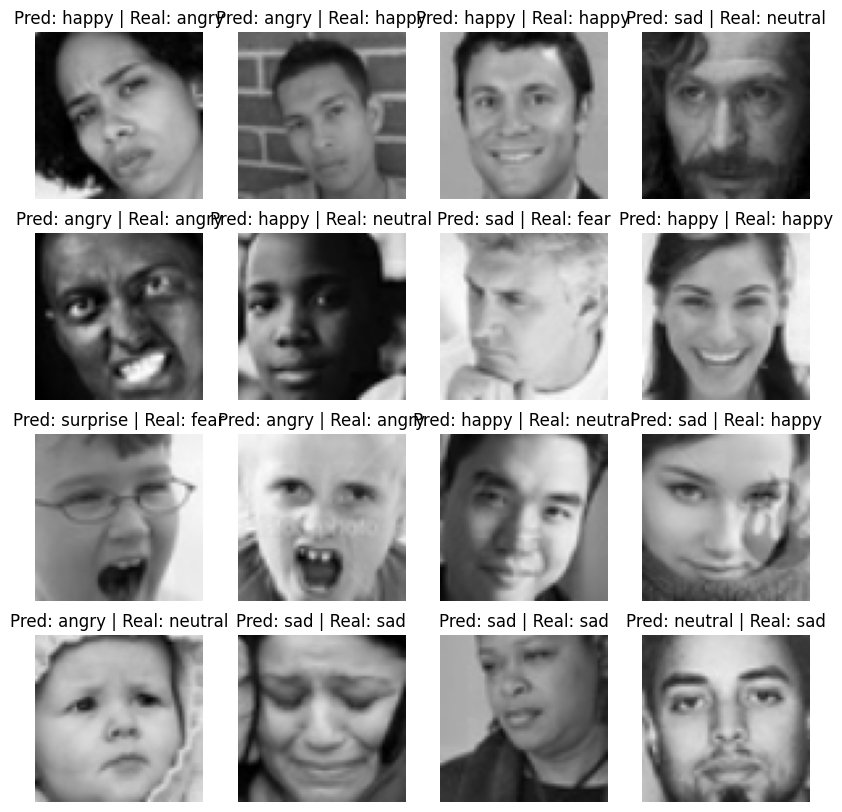

In [ ]:
# Plot sample predictions with images from the test set
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    classifications = model(images)
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        index = np.argmax(classifications[i])
        plt.title(f"Pred: {class_names[index]} | Real: {class_names[labels[i]]}")
        plt.axis("off")
plt.show()

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)